In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def Correlation_SNPs(z_score, region_name, nb_dim=256):
    #z_score = z_score[['CHR','SNP','PVAL']+[f'dim{i}' for i in range(1,nb_dim+1)]]
    #z_score.iloc[:,:8].head()

    # Drop non-numerical columns if necessary
    df_numerical = z_score.drop(['CHR', 'SNP', 'PVAL'], axis=1)

    # Transpose the dataframe
    df_transposed = df_numerical.T

    # Calculate correlation between rows
    correlation_matrix = df_transposed.corr()
    labels = z_score['CHR'].astype(str) + " - " + z_score['SNP']
    correlation_matrix.columns = labels
    correlation_matrix.index = labels

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the heatmap
    sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)

    # Add titles and labels
    plt.title(f"Correlation Matrix Between SNPs from MOSTest on {region_name}")
    plt.xlabel("SNP (CHR - SNP ID)")
    plt.ylabel("SNP (CHR - SNP ID)")

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Display the heatmap
    plt.show()   

    return  correlation_matrix

def Cluster_map_SNPs(z_score, region_name, nb_dim=256):
    # Drop non-numerical columns
    df_numerical = z_score.drop(['CHR', 'SNP', 'PVAL'], axis=1)

    # Transpose the dataframe
    df_transposed = df_numerical.T

    # Calculate correlation between rows
    correlation_matrix = df_transposed.corr()
    labels = z_score['CHR'].astype(str) + " - " + z_score['SNP']
    correlation_matrix.columns = labels
    correlation_matrix.index = labels

    # Draw the clustermap
    g = sns.clustermap(
        correlation_matrix,
        figsize=(16, 16),
        col_cluster=False,
        dendrogram_ratio=(.1, .2),
        cbar_pos=(1.1, .2, .03, .4),
        cmap="coolwarm",
    )

    # Set the title
    g.fig.suptitle(f"Cluster Map for SNPs from MOSTest on {region_name}", y=0.9)

    # Set the labels
    g.ax_heatmap.set_xlabel("SNP (CHR - SNP ID)")
    g.ax_heatmap.set_ylabel("SNP (CHR - SNP ID)")

    # Rotate the x-axis labels for better readability
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)

    # Display the heatmap
    plt.show()

def extract_highly_correlated_snps(correlation_matrix, threshold=0.75):
    correlated_sets = []
    visited = set()

    for i in range(len(correlation_matrix)):
        if i in visited:
            continue

        current_set = {correlation_matrix.index[i]}
        visited.add(i)

        for j in range(i + 1, len(correlation_matrix)):
            if j in visited:
                continue

            # Check if the correlation is above the threshold
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                current_set.add(correlation_matrix.columns[j])
                visited.add(j)

        # Add the current set to the list of correlated sets
        correlated_sets.append(current_set)

    return correlated_sets


In [5]:
path_to_most_results = '/volatile/ad279118/Irene/MOSTEST/Results/'

corr_threshold = 0.8

list_region = ['CINGULATE_right', 'CINGULATE_left', 'ORBITAL_right','ORBITAL_left', 'ORBITAL_left_2', 'SC-sylv_right', 'SC-sylv_left', 'FIP_right', 'FIP_left', 'STi-STs-STpol_left', 'STs_left', 'STs_right']

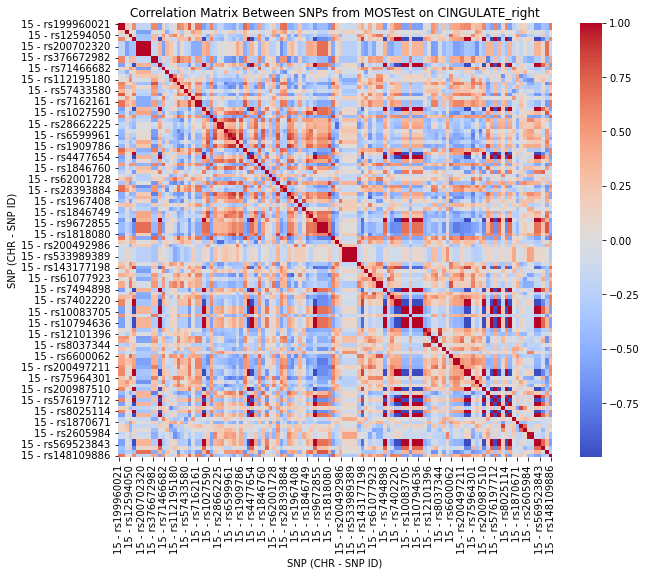

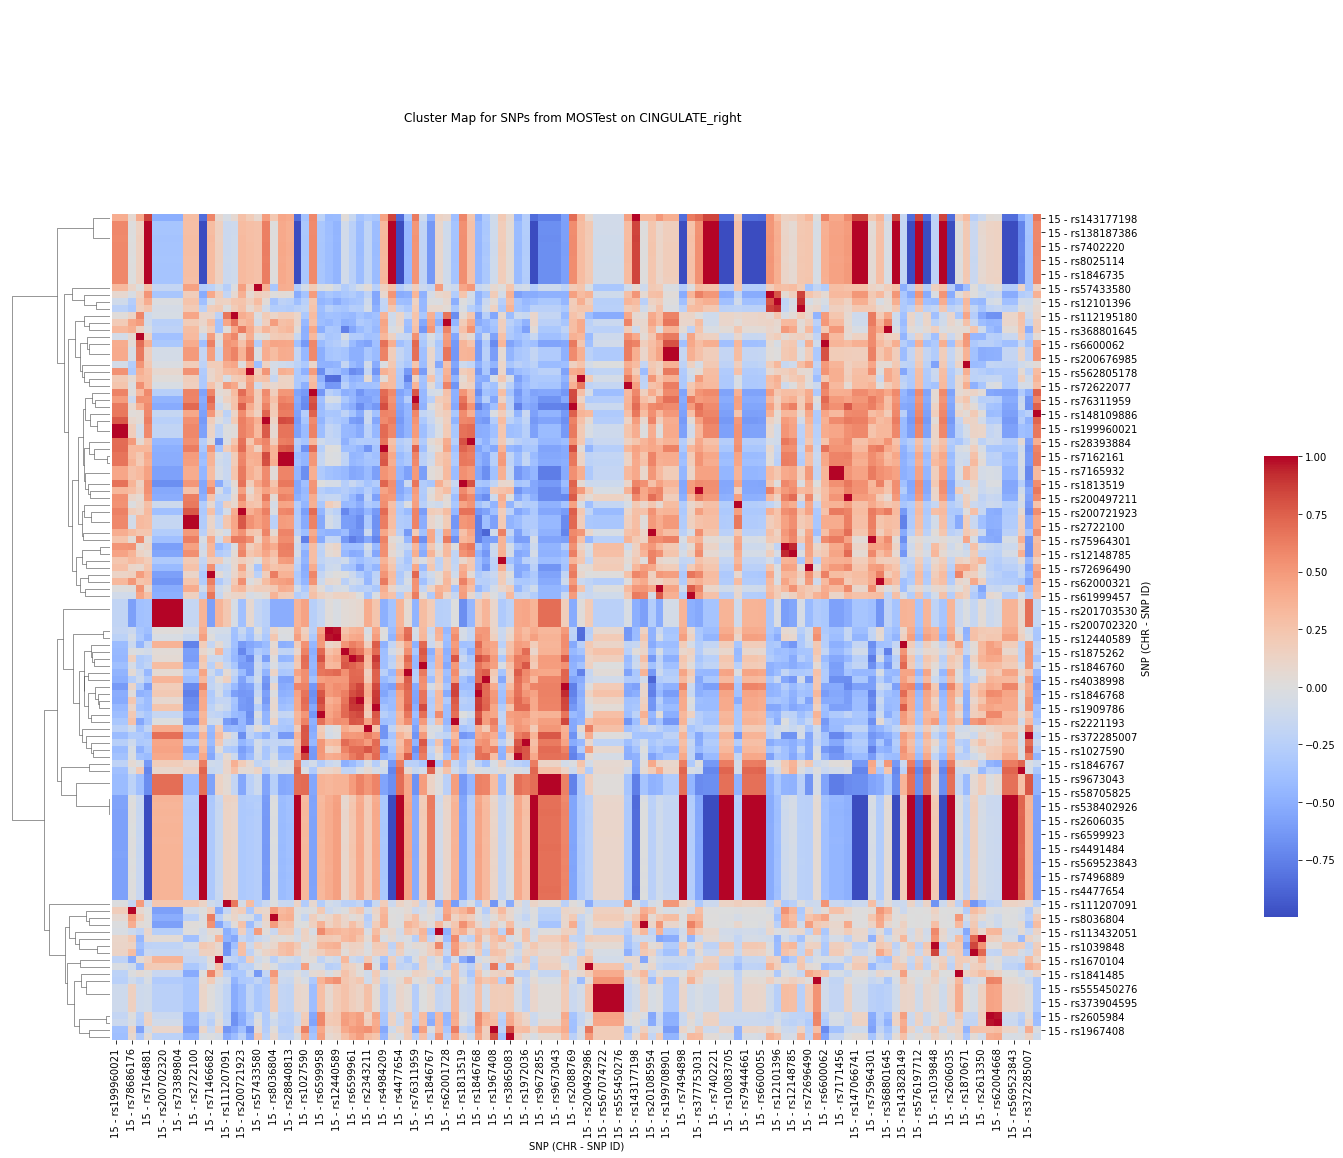

Set 4: {'15 - rs200987510', '15 - rs576197712', '15 - rs10794636', '15 - rs6600055', '15 - rs7402220', '15 - rs8025114', '15 - rs569523843', '15 - rs4491484', '15 - rs2606035', '15 - rs538402926', '15 - rs373955846', '15 - rs10083705', '15 - rs7496889', '15 - rs138187386', '15 - rs143177198', '15 - rs6599923', '15 - rs4477654', '15 - rs6599955', '15 - rs7402221', '15 - rs147066741', '15 - rs2613454', '15 - rs7494898', '15 - rs79444661', '15 - rs7164881', '15 - rs1846735'}

#####################################################################################


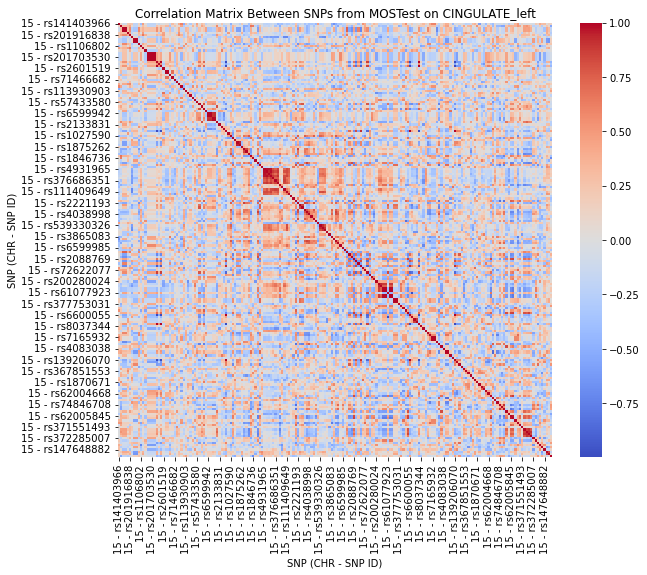

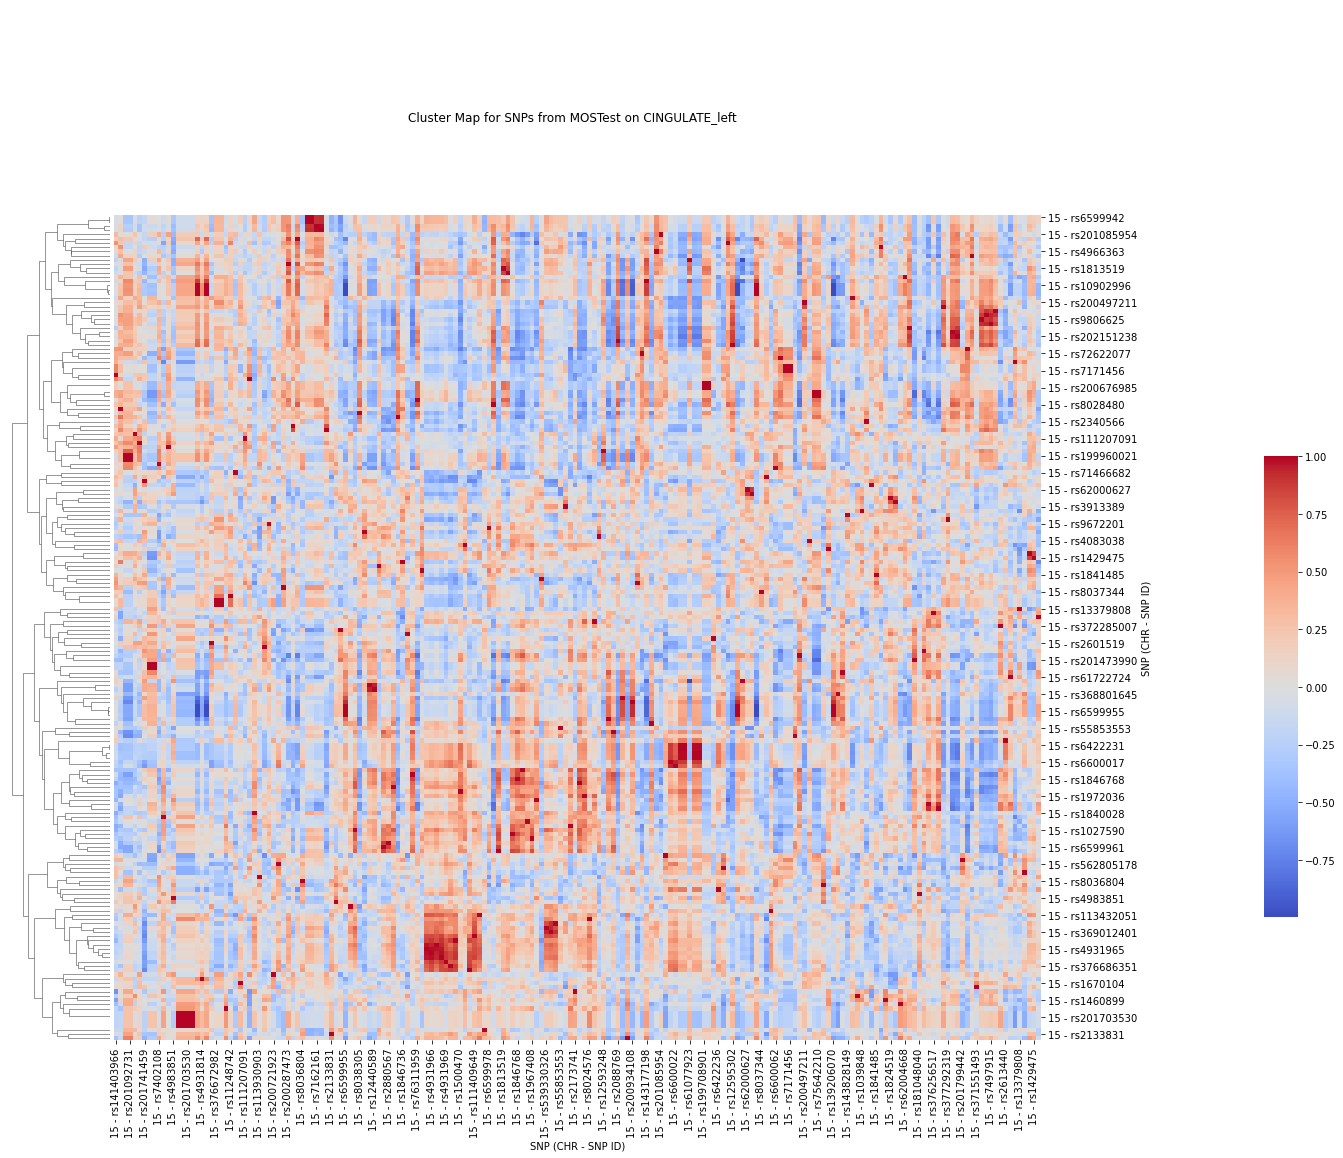

Set 13: {'15 - rs67735421', '15 - rs6600055', '15 - rs10902996', '15 - rs6599955', '15 - rs11635272', '15 - rs200934108', '15 - rs143177198', '15 - rs139206070', '15 - rs8031849'}
Set 51: {'15 - rs4931968', '15 - rs4931965', '15 - rs111409649', '15 - rs4931969', '15 - rs4931966', '15 - rs376547578', '15 - rs4931967'}
Set 76: {'15 - rs2088769', '15 - rs62005845', '15 - rs12595302', '15 - rs12442925', '15 - rs202151238'}
Set 84: {'15 - rs6600022', '15 - rs28492761', '15 - rs6600031', '15 - rs6422232', '15 - rs6422231', '15 - rs6600017'}

#####################################################################################


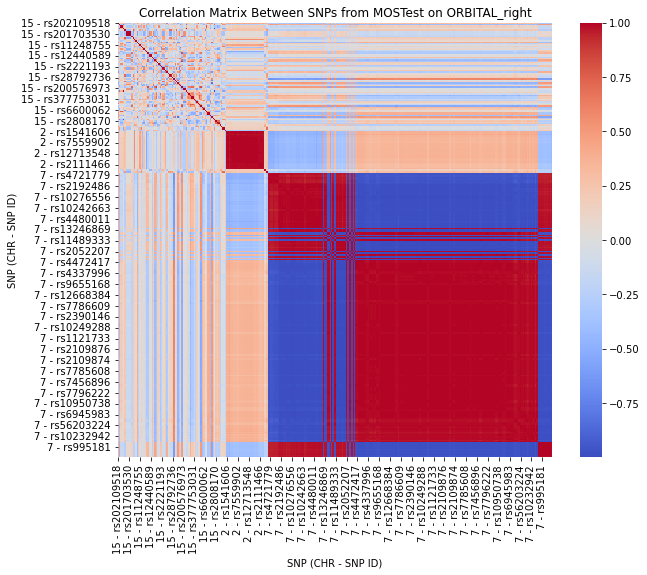

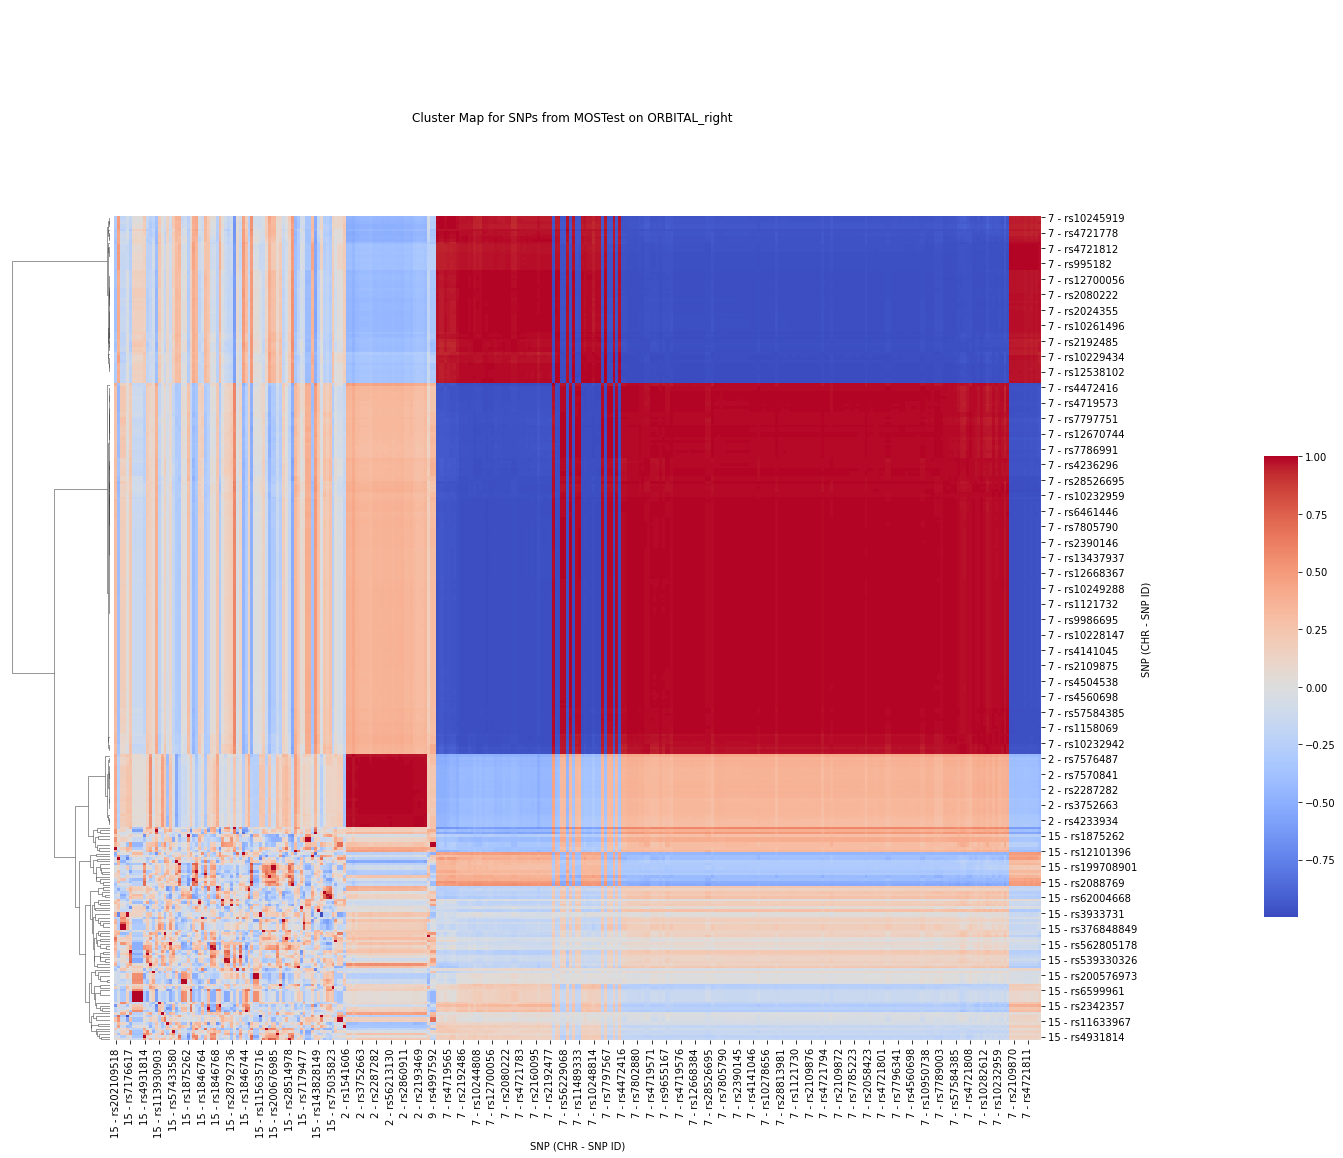

Set 65: {'2 - rs7570841', '2 - rs2860911', '2 - rs7580807', '2 - rs1541606', '2 - rs3752663', '2 - rs3752664', '2 - rs2287286', '2 - rs6546176', '2 - rs2287283', '2 - rs888278', '2 - rs2009778', '2 - rs56213130', '2 - rs6546175', '2 - rs7600385', '2 - rs2111466', '2 - rs4233934', '2 - rs13016586', '2 - rs12713548', '2 - rs7562708', '2 - rs10168499', '2 - rs79968190', '2 - rs7576487', '2 - rs7559902', '2 - rs6743531', '2 - rs11126057', '2 - rs1861771', '2 - rs2193469', '2 - rs2287282'}
Set 68: {'7 - rs1121732', '7 - rs10278656', '7 - rs2080017', '7 - rs4472417', '7 - rs7798205', '7 - rs7796341', '7 - rs10245106', '7 - rs10261832', '7 - rs9648261', '7 - rs6945983', '7 - rs12538102', '7 - rs4721809', '7 - rs985306', '7 - rs62448110', '7 - rs4626493', '7 - rs995182', '7 - rs4721794', '7 - rs7796222', '7 - rs57584385', '7 - rs10276556', '7 - rs12670744', '7 - rs2024347', '7 - rs10248814', '7 - rs1476944', '7 - rs10278512', '7 - rs4721797', '7 - rs10261496', '7 - rs10249288', '7 - rs2109876'

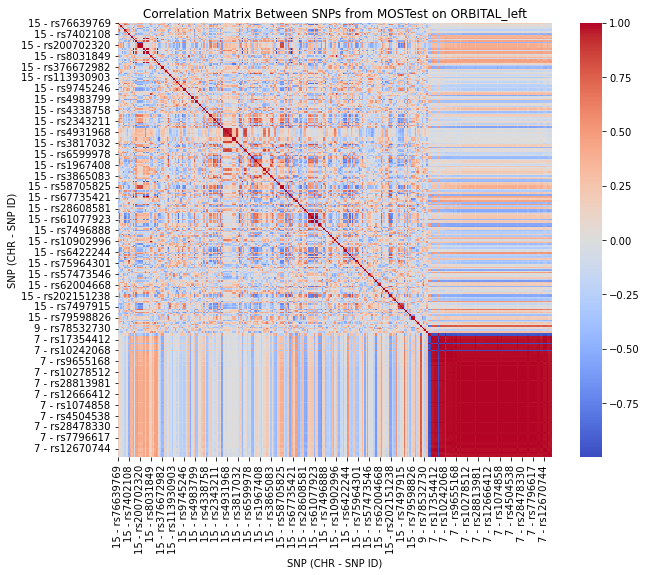

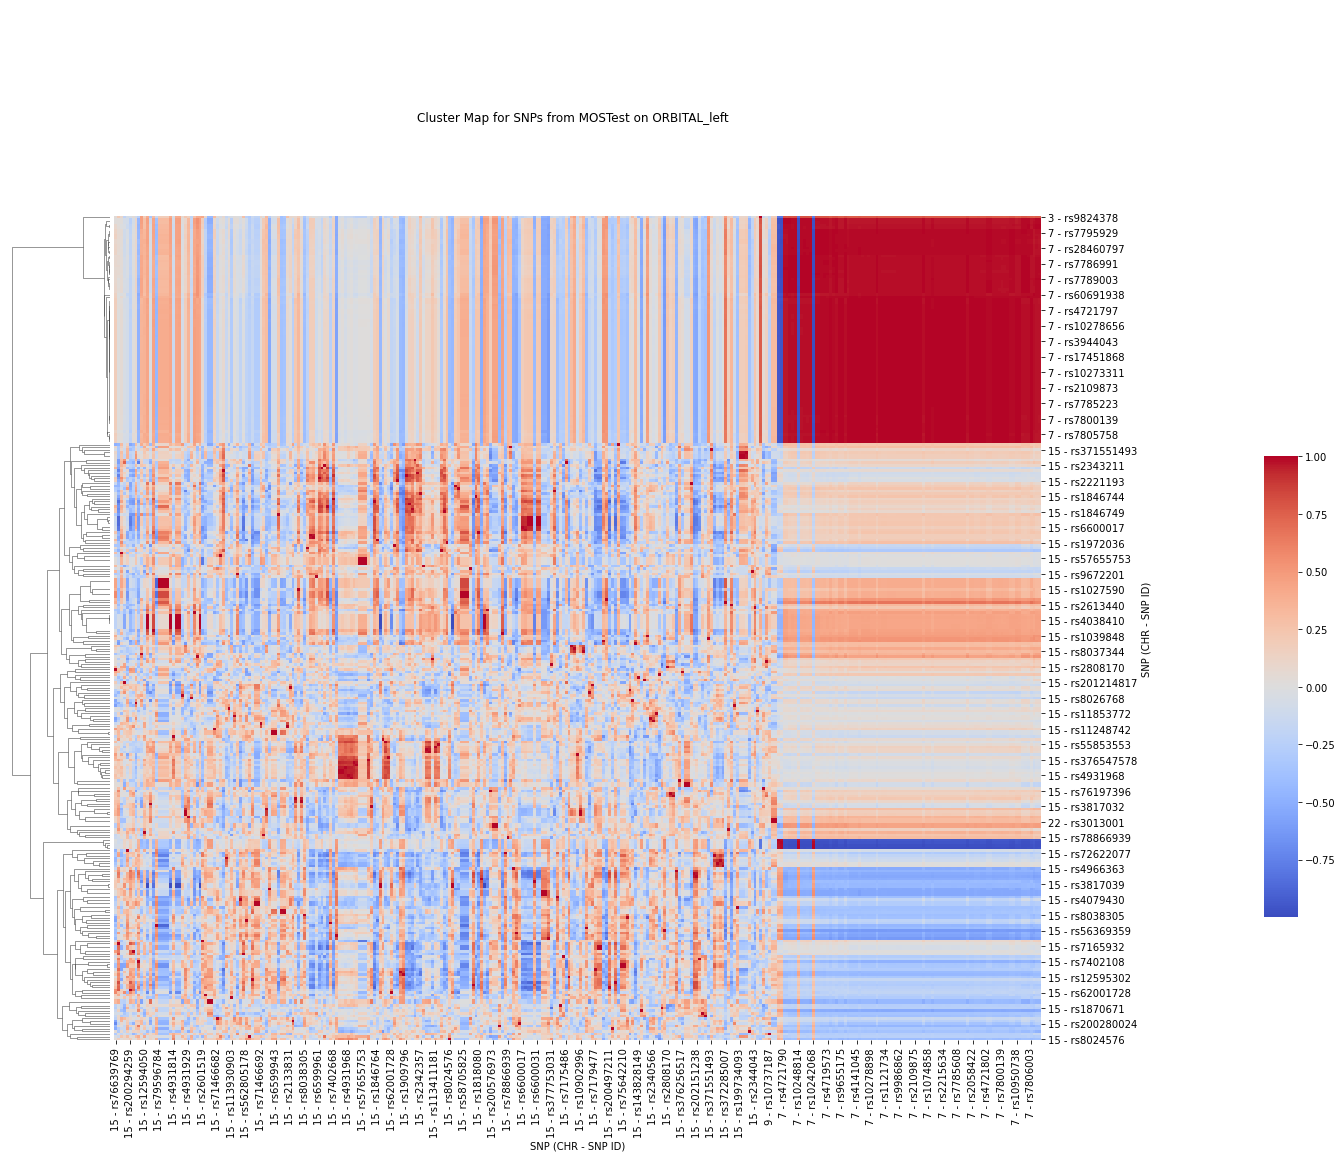

Set 2: {'15 - rs202109518', '15 - rs28492761', '15 - rs1500470', '15 - rs6600031', '15 - rs6422232', '15 - rs28701172', '15 - rs6422231', '15 - rs6600017'}
Set 12: {'15 - rs7165870', '15 - rs4037969', '15 - rs3817039', '15 - rs1846742', '15 - rs6599868', '15 - rs6599879', '15 - rs4983846', '15 - rs2954579', '15 - rs4038410'}
Set 14: {'15 - rs200702320', '15 - rs73389804', '15 - rs9672855', '15 - rs4983851', '15 - rs9673043', '15 - rs201703530', '15 - rs79596784', '15 - rs58705825'}
Set 54: {'15 - rs1909786', '15 - rs2880567', '15 - rs1846749', '15 - rs4038998', '15 - rs6599961', '15 - rs2221193'}
Set 59: {'15 - rs4931968', '15 - rs4931965', '15 - rs376686351', '15 - rs4931969', '15 - rs4931966', '15 - rs375298410', '15 - rs113432051', '15 - rs376547578', '15 - rs4931967'}
Set 147: {'7 - rs10245919', '7 - rs10248814', '7 - rs7797751', '3 - rs9824378', '7 - rs17354412'}
Set 152: {'7 - rs1121732', '7 - rs10278656', '7 - rs4472417', '7 - rs10261832', '7 - rs62448110', '7 - rs4721794', '7 -

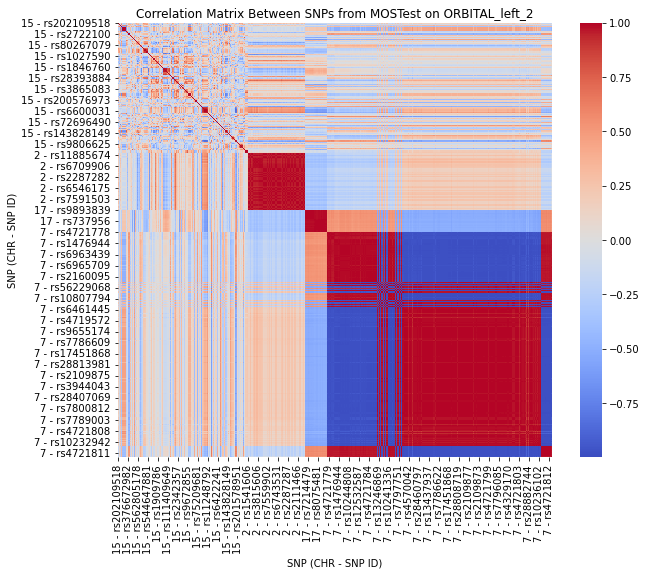

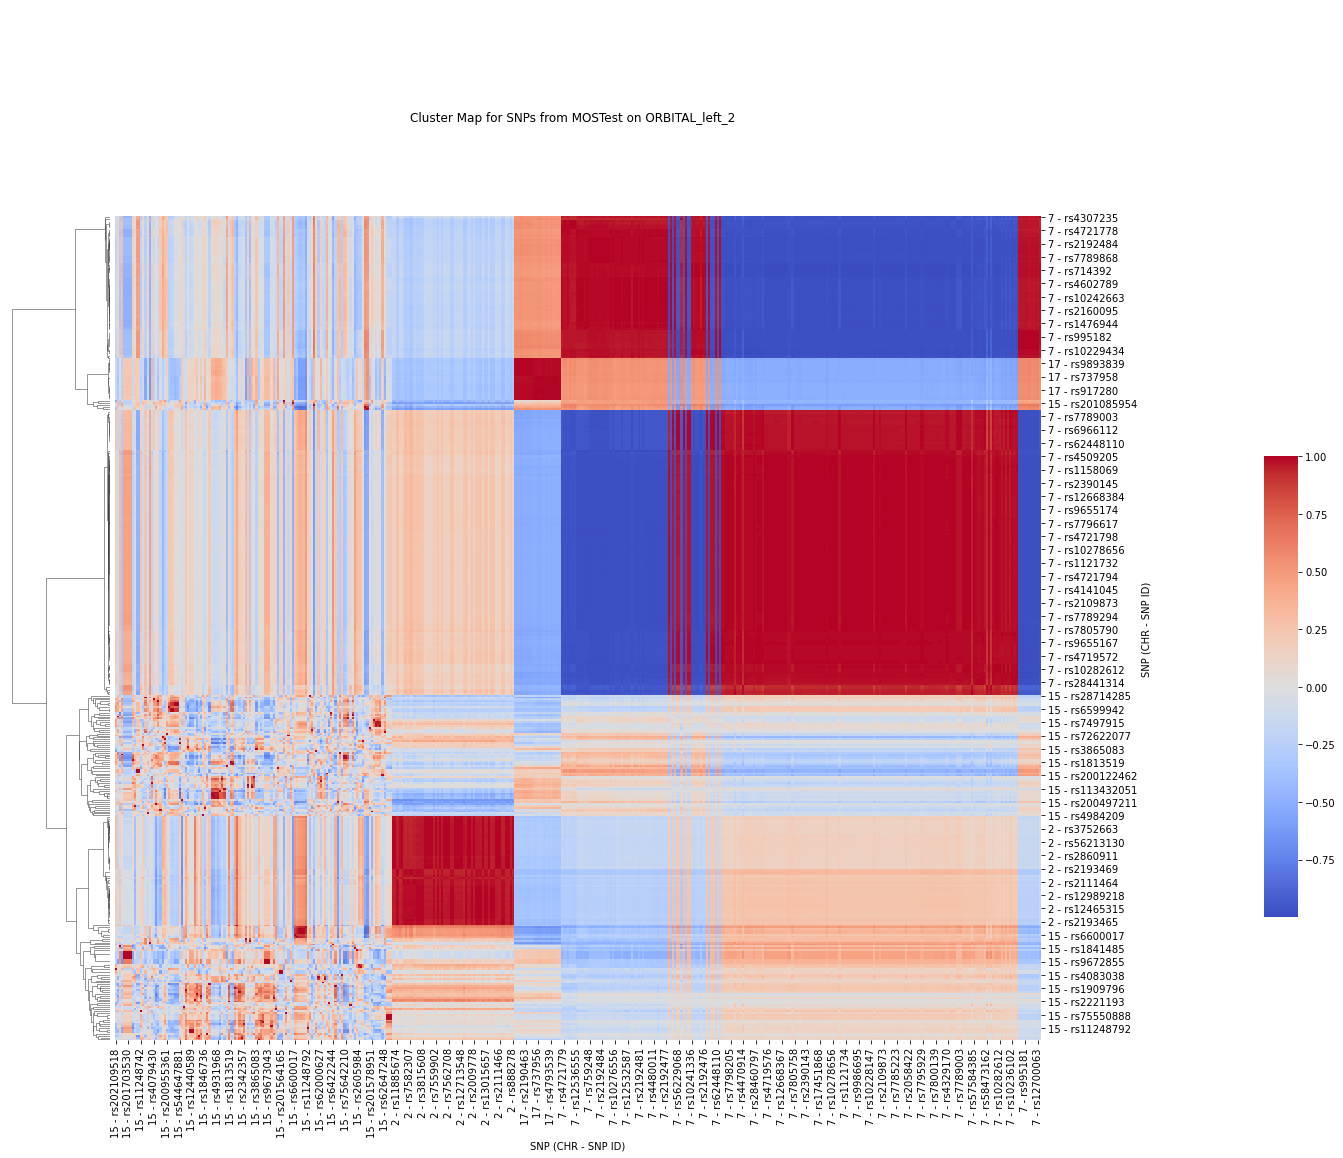

Set 37: {'15 - rs4931968', '15 - rs4931965', '15 - rs4931966', '15 - rs113432051', '15 - rs4931967'}
Set 63: {'15 - rs6600022', '15 - rs28492761', '15 - rs6600031', '15 - rs6422232', '15 - rs6422231', '15 - rs6600017'}
Set 95: {'2 - rs7570841', '2 - rs13015657', '2 - rs2860911', '2 - rs3815608', '2 - rs12997745', '2 - rs7580807', '2 - rs12465315', '2 - rs1541606', '2 - rs2287282', '2 - rs3752663', '2 - rs3752664', '2 - rs13008325', '2 - rs2287286', '2 - rs6546176', '2 - rs2287283', '2 - rs888278', '2 - rs2287281', '2 - rs12713549', '2 - rs2193463', '2 - rs17681189', '2 - rs2009778', '2 - rs56213130', '2 - rs6546178', '2 - rs1861771', '2 - rs6709906', '2 - rs6546175', '2 - rs7600385', '2 - rs12989218', '2 - rs3815606', '2 - rs2111466', '2 - rs4233934', '2 - rs13016586', '2 - rs13008718', '2 - rs7562708', '2 - rs12713548', '2 - rs10168499', '2 - rs1549022', '2 - rs79968190', '2 - rs7576487', '2 - rs7559902', '2 - rs6743531', '2 - rs11126057', '2 - rs2287287', '2 - rs7591503', '2 - rs7582

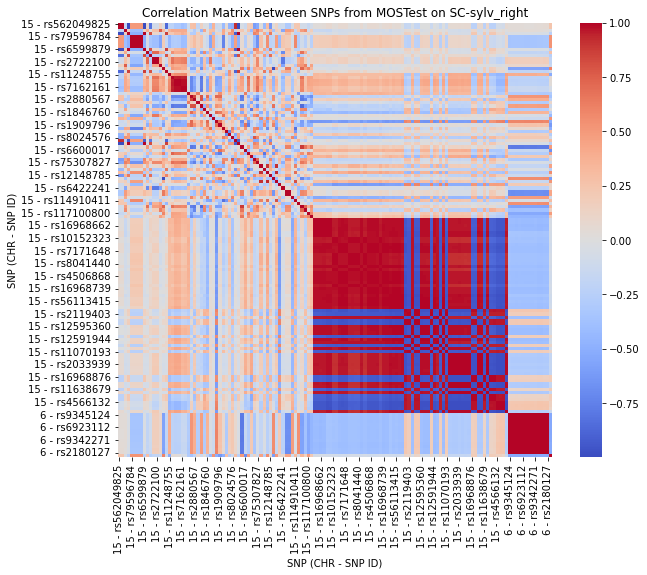

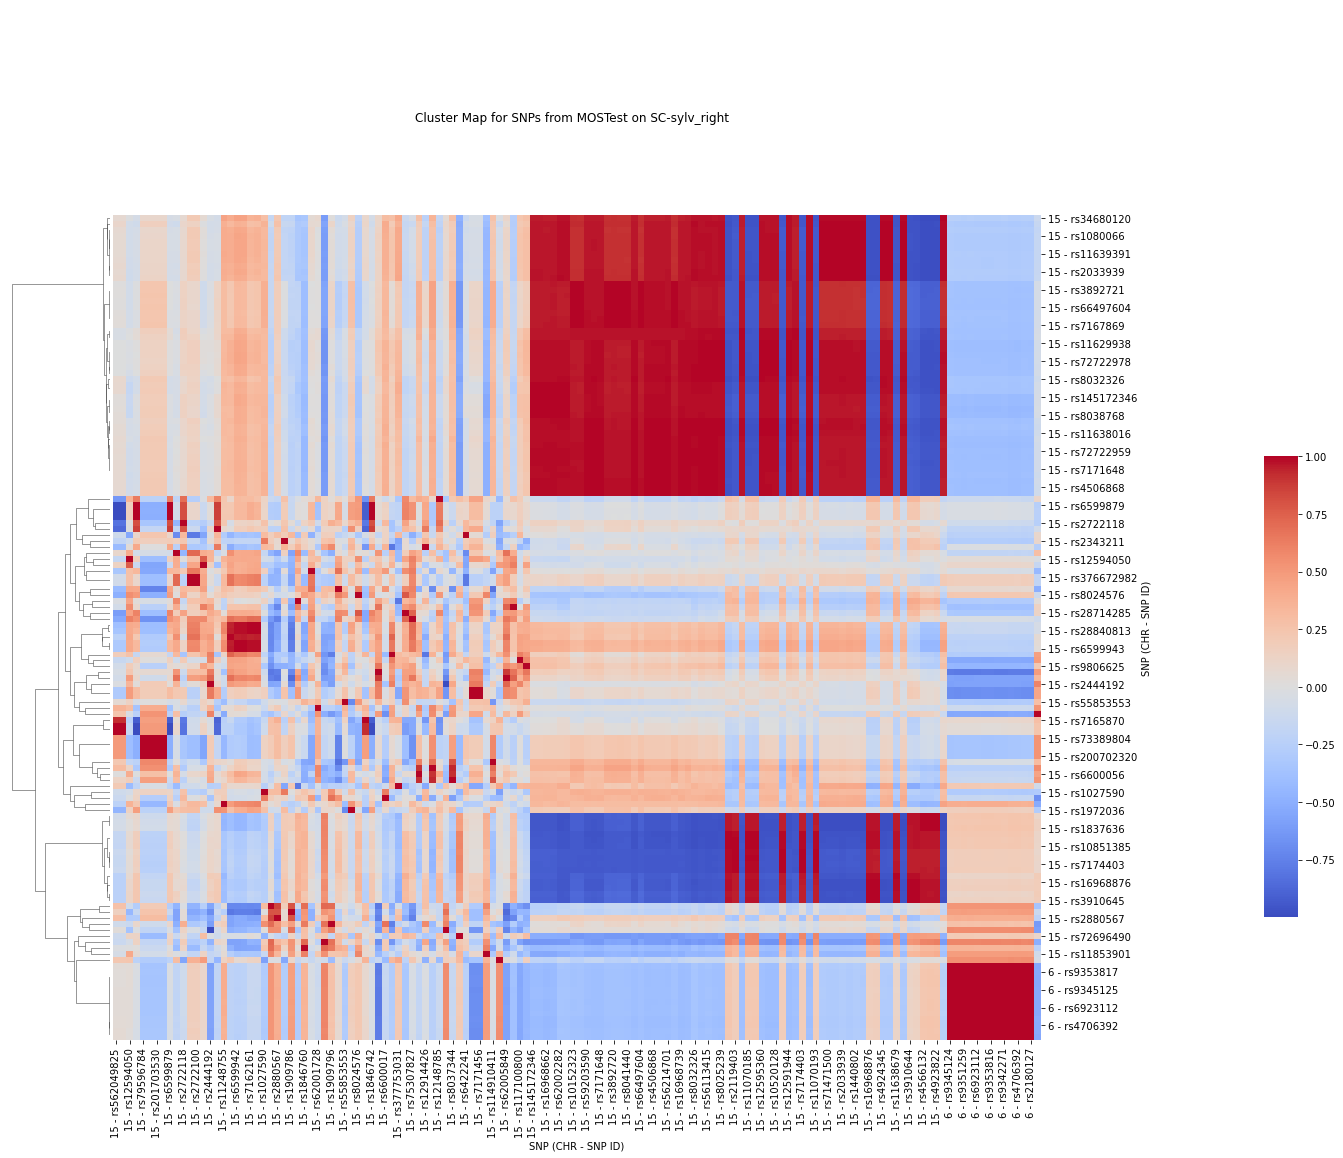

Set 1: {'15 - rs7165870', '15 - rs4037969', '15 - rs1846742', '15 - rs6599879', '15 - rs11248748', '15 - rs2722118', '15 - rs562049825', '15 - rs573931406'}
Set 9: {'15 - rs7162161', '15 - rs6599943', '15 - rs6599942', '15 - rs28840813', '15 - rs200287473'}
Set 41: {'15 - rs1080066', '15 - rs62002285', '15 - rs139801643', '15 - rs4506868', '15 - rs10520128', '15 - rs1440802', '15 - rs12592015', '15 - rs3892721', '15 - rs11639391', '15 - rs56214701', '15 - rs9302101', '15 - rs59203590', '15 - rs4924345', '15 - rs56113415', '15 - rs16968662', '15 - rs12591944', '15 - rs8038768', '15 - rs62002283', '15 - rs11070189', '15 - rs71471500', '15 - rs7174403', '15 - rs8033007', '15 - rs16968876', '15 - rs56003663', '15 - rs66497604', '15 - rs11070193', '15 - rs4923822', '15 - rs72722959', '15 - rs145172346', '15 - rs7182018', '15 - rs8041440', '15 - rs34680120', '15 - rs11638016', '15 - rs17694988', '15 - rs11629938', '15 - rs72722978', '15 - rs3892720', '15 - rs10851383', '15 - rs4566132', '15 

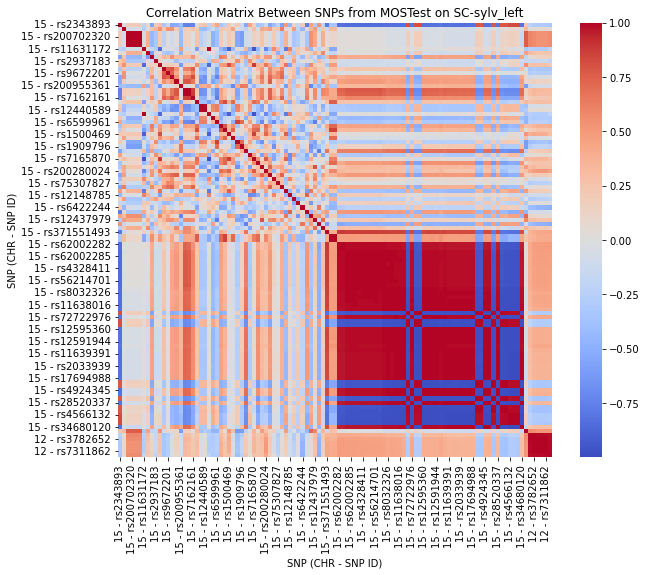

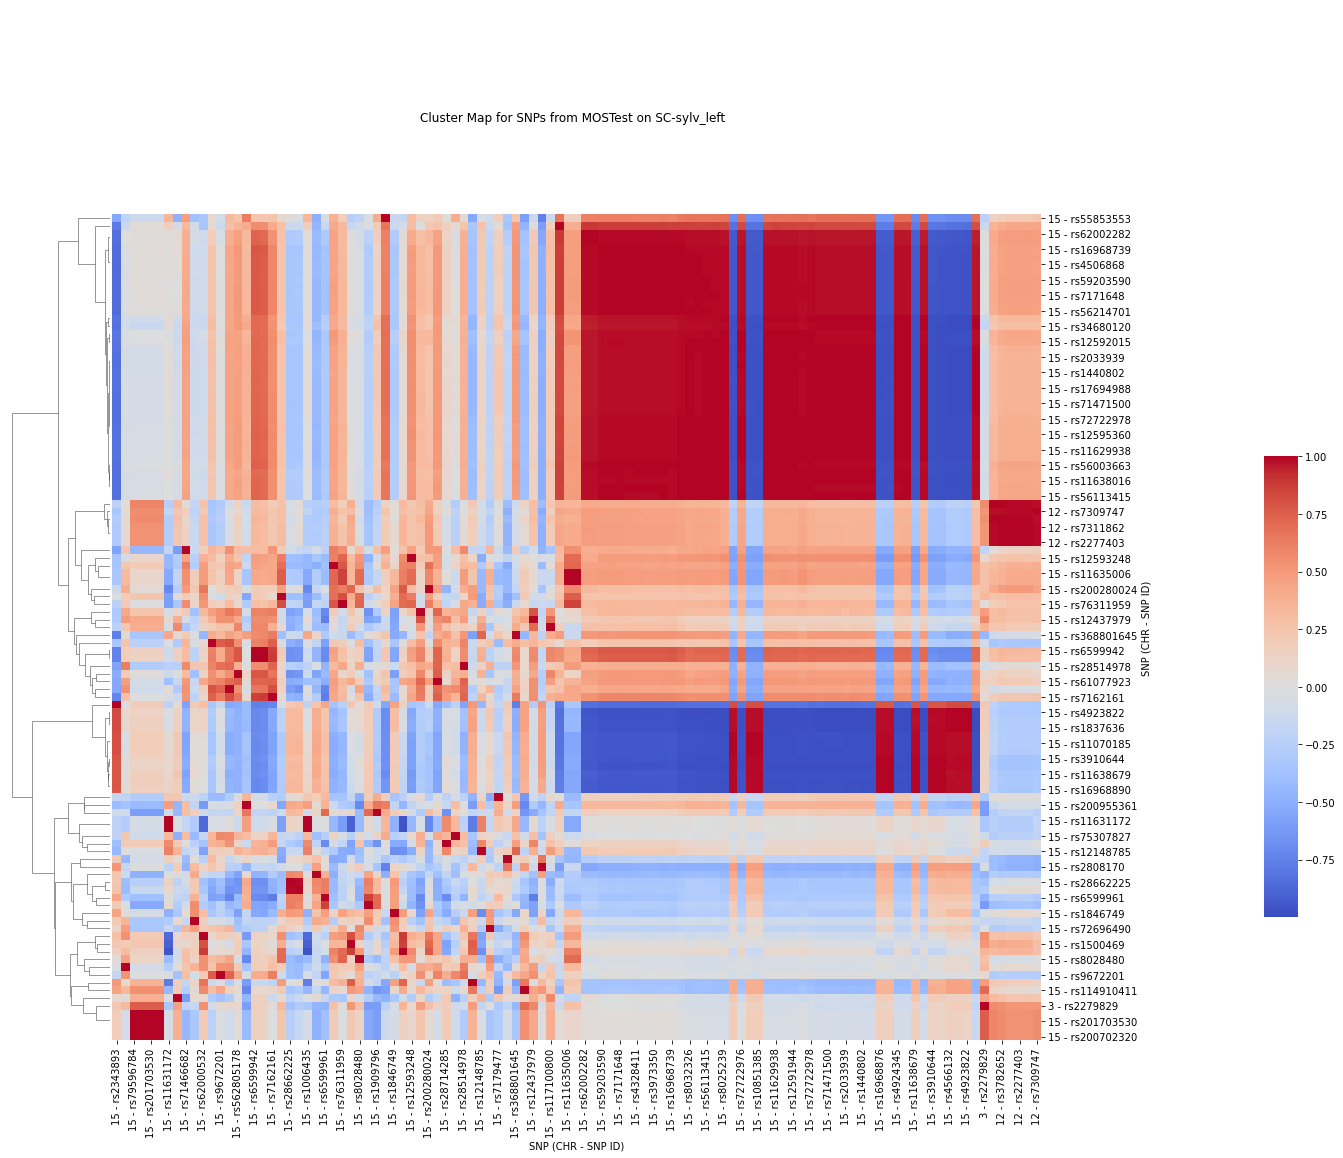

Set 1: {'15 - rs1080066', '15 - rs62002285', '15 - rs4506868', '15 - rs10520128', '15 - rs1440802', '15 - rs12592015', '15 - rs11639391', '15 - rs56214701', '15 - rs4924345', '15 - rs59203590', '15 - rs56113415', '15 - rs12591944', '15 - rs62002283', '15 - rs71471500', '15 - rs8033007', '15 - rs56003663', '15 - rs4923822', '15 - rs72722959', '15 - rs7182018', '15 - rs34680120', '15 - rs2343893', '15 - rs11638016', '15 - rs17694988', '15 - rs11629938', '15 - rs72722978', '15 - rs10851383', '15 - rs4566132', '15 - rs7171648', '15 - rs28520337', '15 - rs4328411', '15 - rs3973350', '15 - rs16968739', '15 - rs10851385', '15 - rs8032326', '15 - rs12595360', '15 - rs8025239', '15 - rs1837636', '15 - rs4924346', '15 - rs11070185', '15 - rs2033939', '15 - rs62002282'}
Set 4: {'15 - rs7165870', '15 - rs11631172', '15 - rs1006435', '15 - rs62000532', '15 - rs1500469'}
Set 44: {'12 - rs3782652', '12 - rs7309747', '12 - rs2277403', '12 - rs1860957', '12 - rs7311862', '12 - rs3782659'}

############

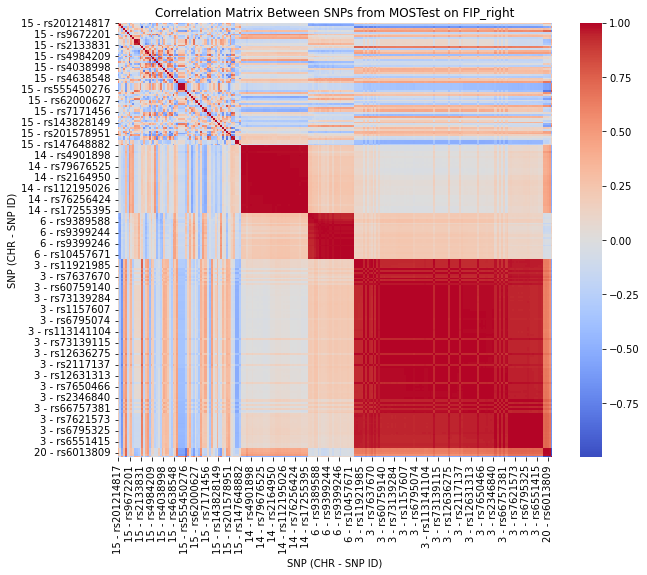

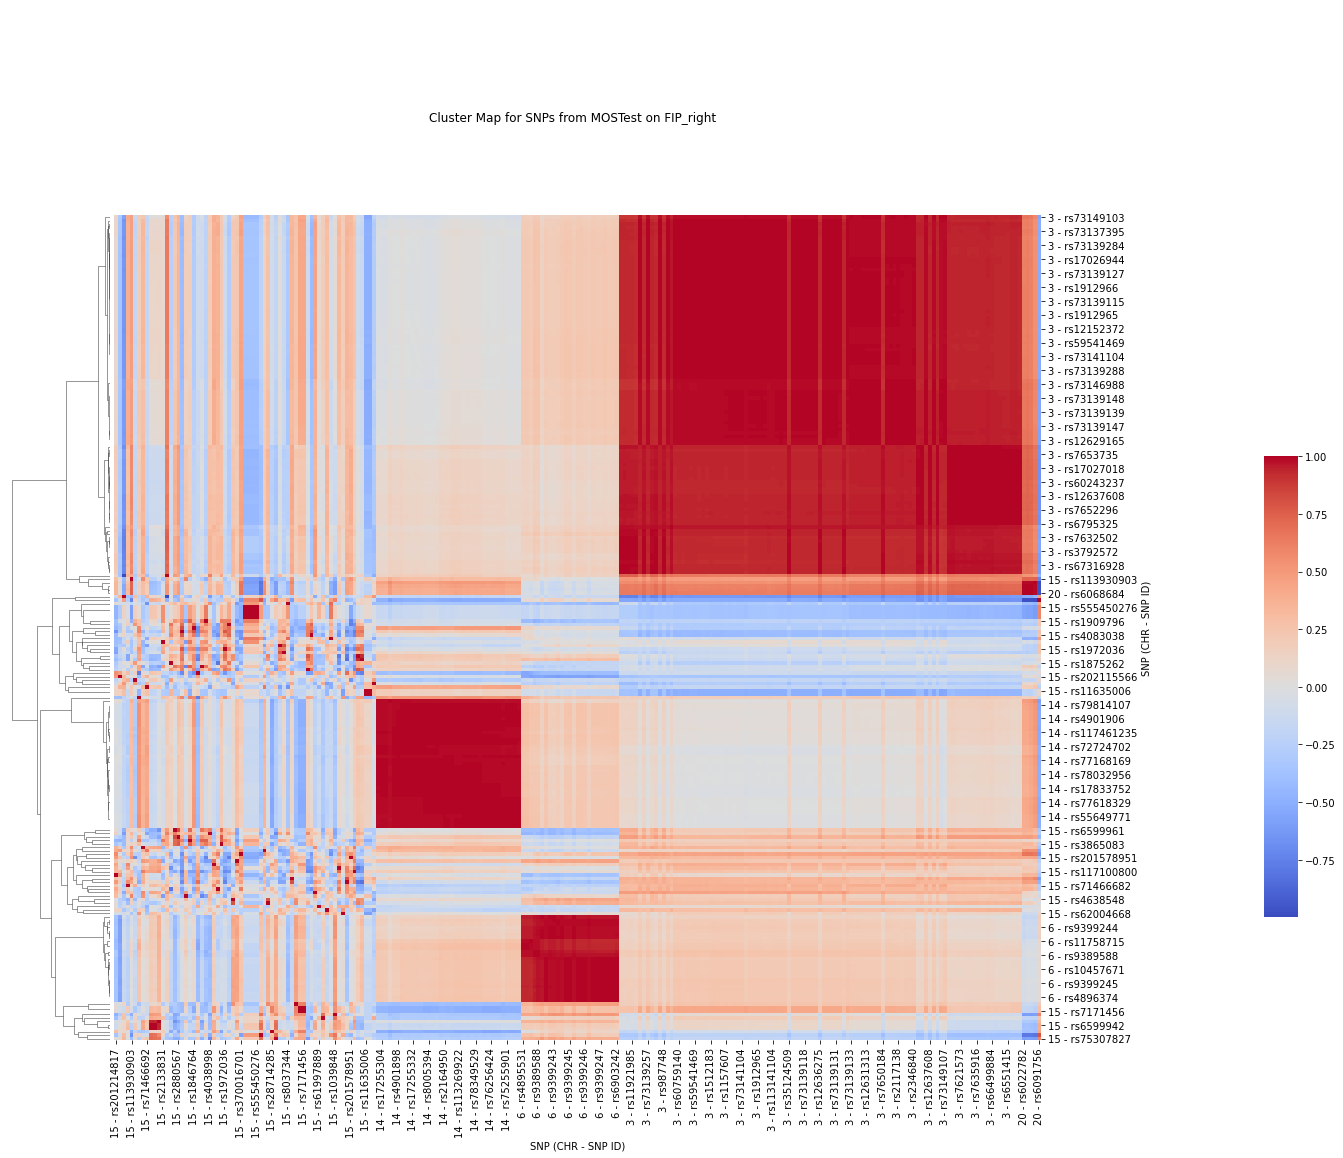

Set 55: {'14 - rs4901904', '14 - rs76850797', '14 - rs55649771', '14 - rs4901906', '14 - rs4901898', '14 - rs77618329', '14 - rs2164950', '14 - rs78032956', '14 - rs74826997', '14 - rs17255332', '14 - rs17255304', '14 - rs112195026', '14 - rs72726305', '14 - rs75255901', '14 - rs72724702', '14 - rs117461235', '14 - rs73313052', '14 - rs78349529', '14 - rs17833752', '14 - rs76787422', '14 - rs8005394', '14 - rs113269922', '14 - rs56115079', '14 - rs77168169', '14 - rs79676525', '14 - rs76341705', '14 - rs17255311', '14 - rs78580207', '14 - rs4901902', '14 - rs76674533', '14 - rs79814107', '14 - rs143720575', '14 - rs76256424', '14 - rs78419480', '14 - rs79360654', '14 - rs10498489', '14 - rs17255395'}
Set 56: {'6 - rs9389588', '6 - rs9399246', '6 - rs10457671', '6 - rs4895533', '6 - rs4620141', '6 - rs4481452', '6 - rs11758715', '6 - rs9399245', '6 - rs4243453', '6 - rs4243455', '6 - rs4131177', '6 - rs4895534', '6 - rs4895532', '6 - rs4895531', '6 - rs9402980', '6 - rs9399247', '6 - rs

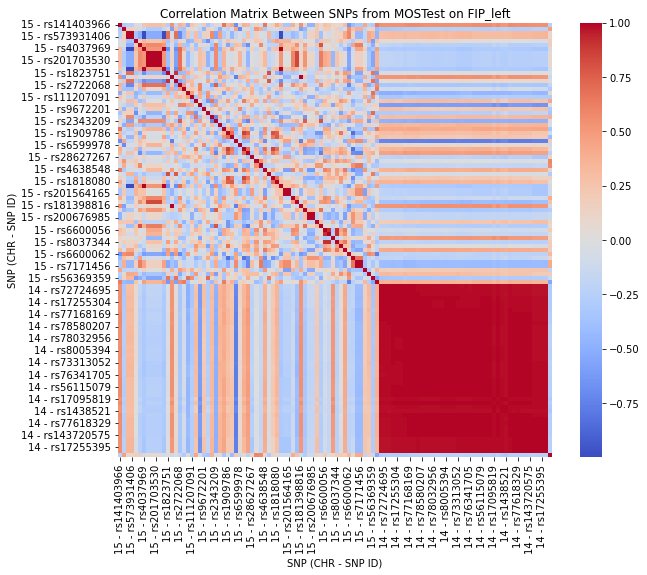

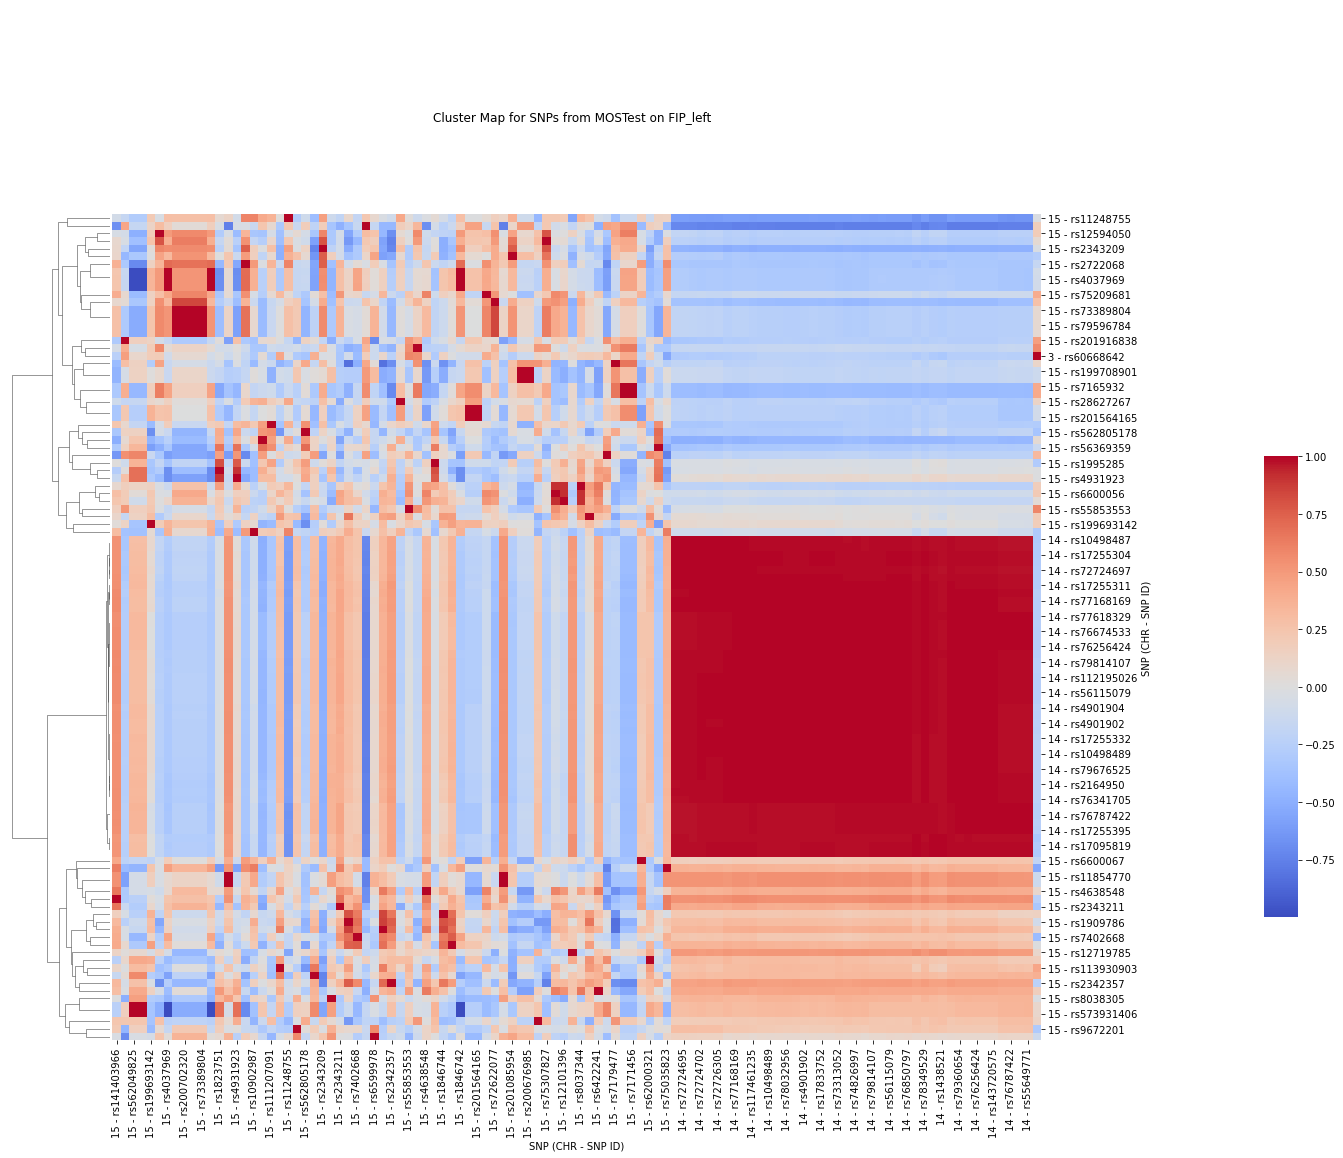

Set 3: {'15 - rs4037969', '15 - rs1846742', '15 - rs6599879', '15 - rs562049825', '15 - rs573931406'}
Set 6: {'15 - rs200702320', '15 - rs73389804', '15 - rs72622077', '15 - rs201703530', '15 - rs79596784'}
Set 47: {'14 - rs4901904', '14 - rs10498487', '14 - rs76850797', '14 - rs55649771', '14 - rs4901906', '14 - rs17095819', '14 - rs4901898', '14 - rs77618329', '14 - rs2164950', '14 - rs78032956', '14 - rs74826997', '14 - rs17255332', '14 - rs17255304', '14 - rs112195026', '14 - rs72724697', '14 - rs72726305', '14 - rs28673301', '14 - rs75255901', '14 - rs72724702', '14 - rs117461235', '14 - rs73313052', '14 - rs78349529', '14 - rs17833752', '14 - rs76787422', '14 - rs8005394', '14 - rs113269922', '14 - rs56115079', '14 - rs72724695', '14 - rs1438521', '14 - rs77168169', '14 - rs79676525', '14 - rs76341705', '14 - rs17255311', '14 - rs78580207', '14 - rs4901902', '14 - rs76674533', '14 - rs79814107', '14 - rs143720575', '14 - rs76256424', '14 - rs79360654', '14 - rs10498489', '14 - rs

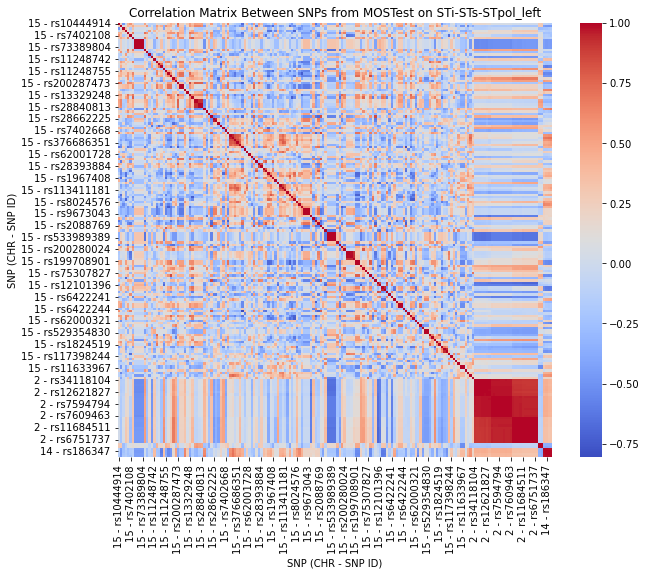

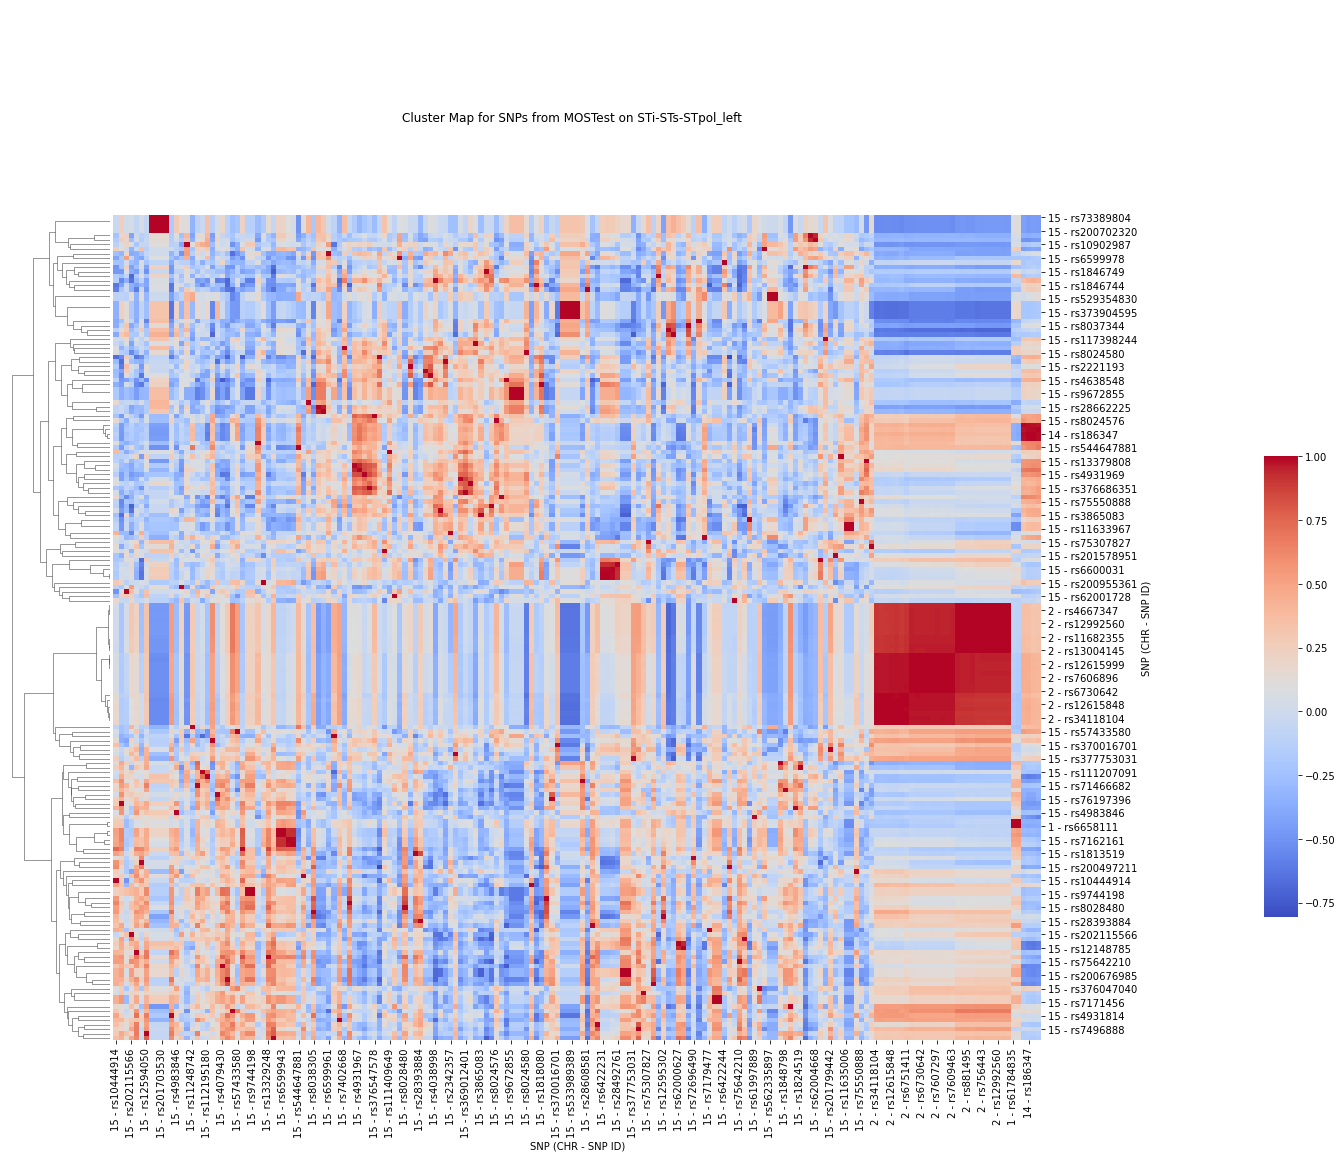

Set 114: {'2 - rs7607297', '2 - rs13006546', '2 - rs13035861', '2 - rs11682355', '2 - rs12621827', '2 - rs881495', '2 - rs7594794', '2 - rs6730642', '2 - rs6737636', '2 - rs756443', '2 - rs10930572', '2 - rs13004145', '2 - rs6751411', '2 - rs12992560', '2 - rs13026041', '2 - rs16826589', '2 - rs35397906', '2 - rs13011264', '2 - rs12615999', '2 - rs7606896', '2 - rs11684511', '2 - rs6751737', '2 - rs34118104', '2 - rs12615848', '2 - rs4667347', '2 - rs7609463', '2 - rs35537026'}

#####################################################################################


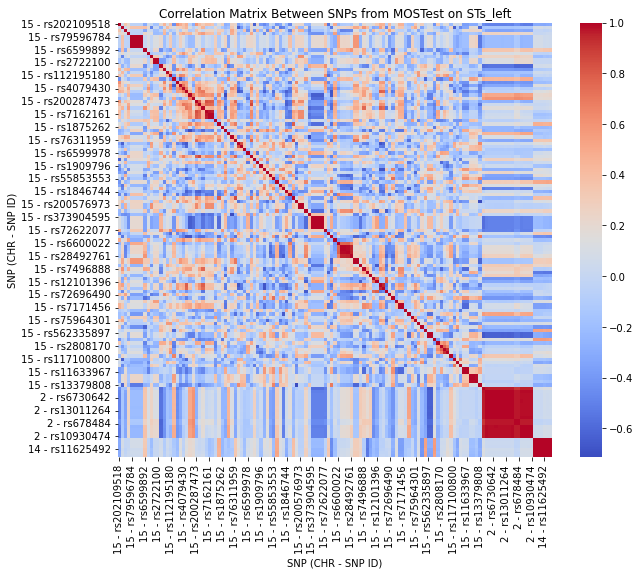

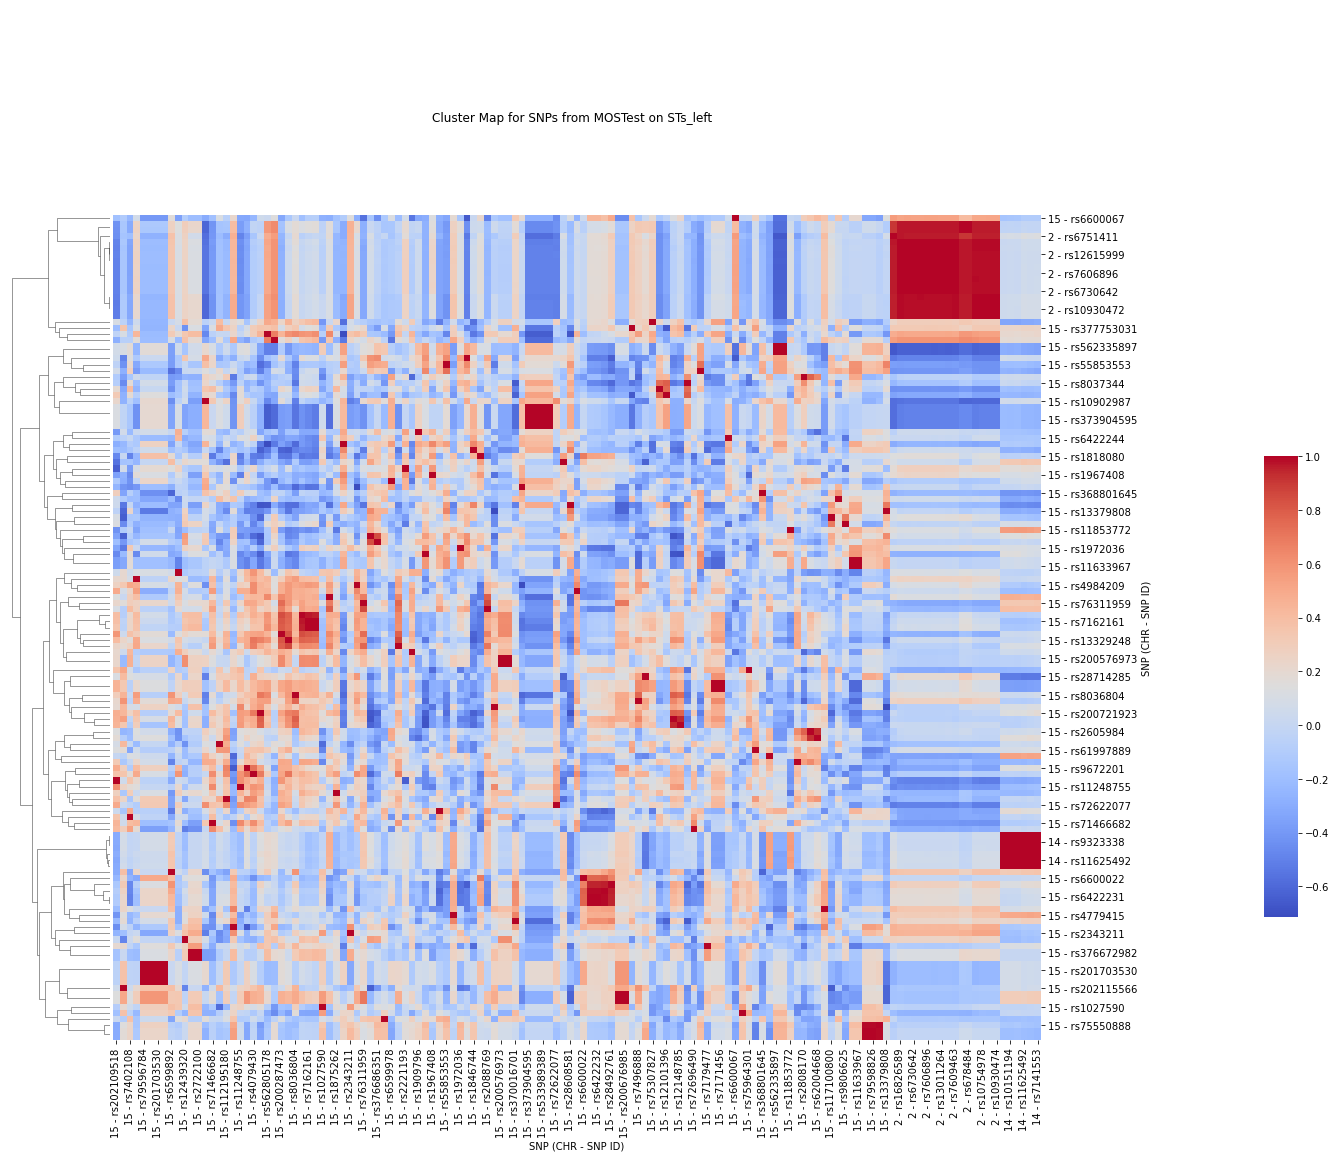

Set 90: {'2 - rs7607297', '2 - rs34210632', '2 - rs6751411', '2 - rs10930474', '2 - rs12615999', '2 - rs7594794', '2 - rs6730642', '2 - rs678915', '2 - rs678484', '2 - rs16826589', '2 - rs6737636', '2 - rs13011264', '2 - rs7609463', '2 - rs10930472', '2 - rs10754978', '2 - rs7606896'}
Set 91: {'14 - rs10498488', '14 - rs9323338', '14 - rs12147351', '14 - rs11625492', '14 - rs7141553', '14 - rs10151194'}

#####################################################################################


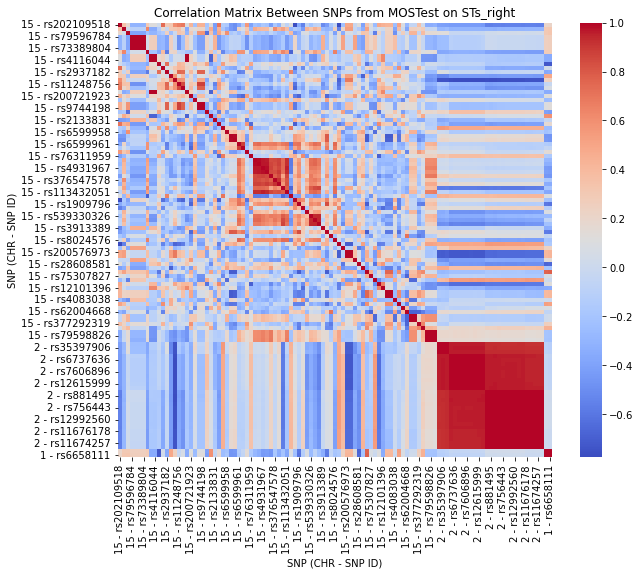

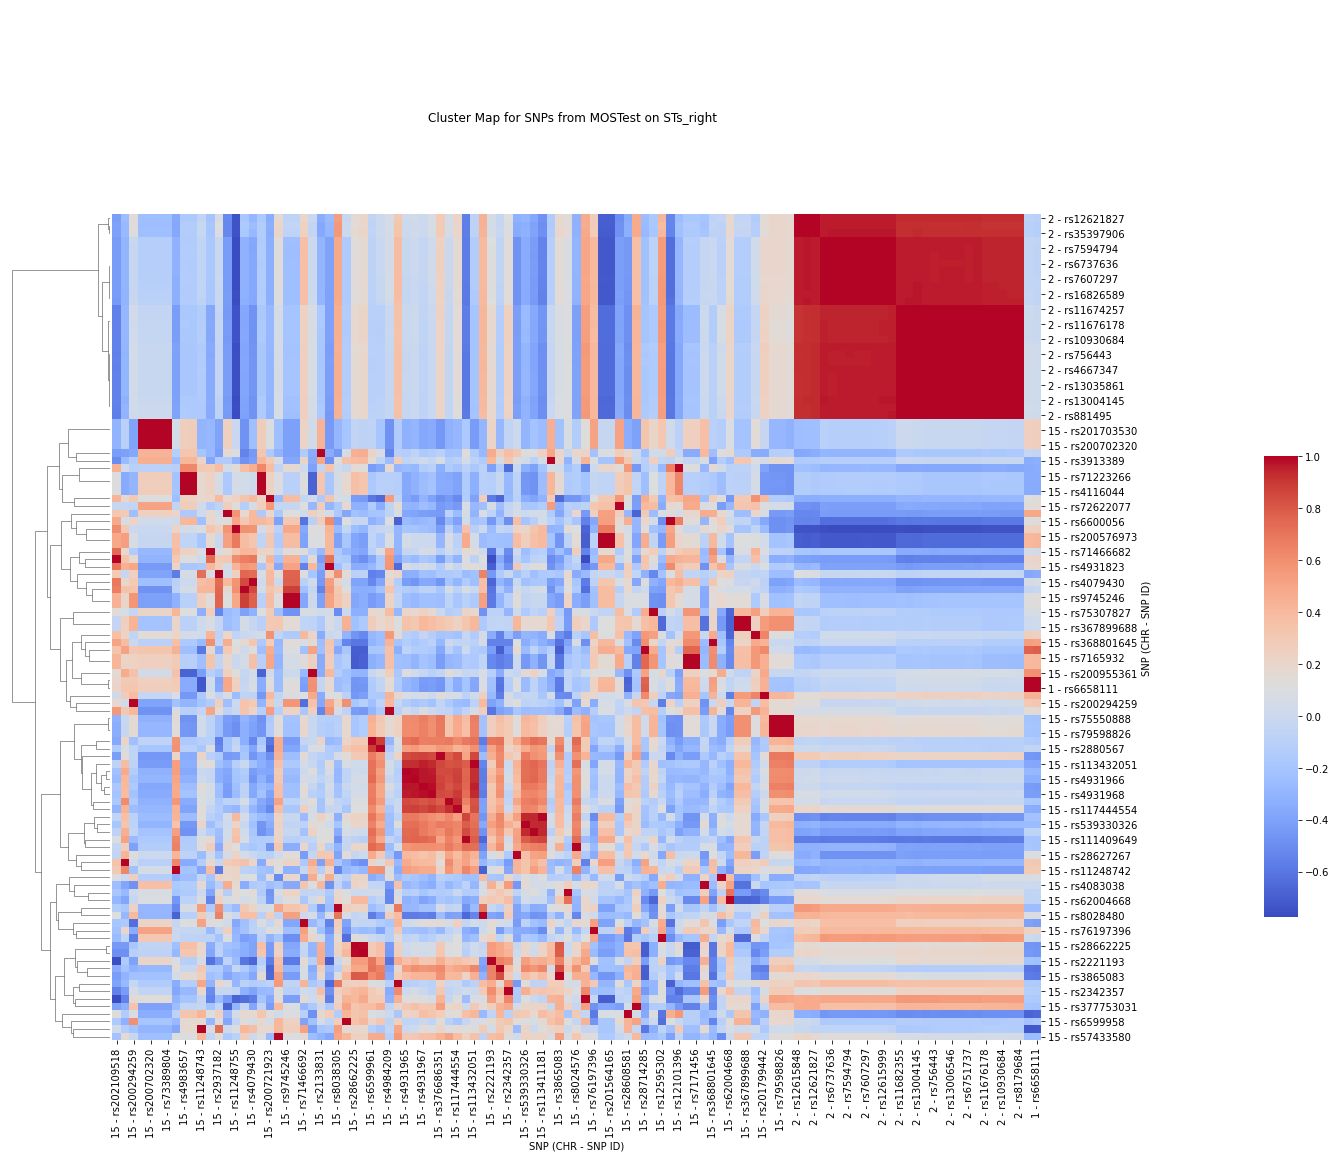

Set 25: {'15 - rs376686351', '15 - rs4931965', '15 - rs4931968', '15 - rs4931966', '15 - rs113432051', '15 - rs117444554', '15 - rs376547578', '15 - rs4931967'}
Set 56: {'2 - rs7607297', '2 - rs13006546', '2 - rs13035861', '2 - rs11682355', '2 - rs12621827', '2 - rs11676178', '2 - rs881495', '2 - rs11674257', '2 - rs7594794', '2 - rs6730642', '2 - rs6737636', '2 - rs756443', '2 - rs13004145', '2 - rs8179684', '2 - rs12992560', '2 - rs16826589', '2 - rs13011264', '2 - rs35397906', '2 - rs11684511', '2 - rs12615999', '2 - rs7606896', '2 - rs6751737', '2 - rs12615848', '2 - rs10930684', '2 - rs4667347', '2 - rs11673945', '2 - rs7609463'}

#####################################################################################


In [6]:
for region_name in list_region:
        z_score = pd.read_csv(f'{path_to_most_results}/{region_name}_mostest_all_chr.most_orig.zmat.csv', sep='\t')
        ukb_orbital_right_embeddings = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_right/15-53-41_191//ukb_random_epoch80_embeddings/full_embeddings.csv', index_col=0)

        correlation_matrix = Correlation_SNPs(z_score, region_name)

        Cluster_map_SNPs(z_score, region_name)

        correlated_sets = extract_highly_correlated_snps(correlation_matrix, threshold=corr_threshold)

        for idx, snp_set in enumerate(correlated_sets):
                if len(snp_set)>4:
                        print(f"Set {idx + 1}: {snp_set}")

        print()
        print("#####################################################################################")
